# Load the data files and structure the data

In [1]:
import os
os.chdir("/Users/mphomafata/Documents/GitHub/Chromatographic-data")
import pandas as pd
from scipy.io import netcdf_file

beer_files = sorted(os.listdir(
    "/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/"))
beer_data = []
for beer_file in beer_files:
    cdf_file = netcdf_file(
        f'/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/{beer_file}',
        mmap=False)
    data = pd.DataFrame(columns=["retention_time", "mass_values", "intensities"])
    # variables of interest
    mass_values = cdf_file.variables['mass_values'].data
    retention_time = cdf_file.variables['scan_acquisition_time'].data
    point_count = cdf_file.variables['point_count'].data

    # cumulative counter 
    def Cumulative(lists):
        cu_list = []
        length = len(lists)
        cu_list = [sum(lists[0:x:1]) for x in range(0, length + 1)]
        return cu_list[1:]

    lists = point_count
    point_counter = Cumulative(lists)

    for i, s in enumerate(retention_time):
        if i == 0:
            start = i
        else:
            start = point_counter[i - 1] + 1
        stop = point_counter[i]
        rt = cdf_file.variables['scan_acquisition_time'][i]
        # print("retention time " + str(rt)+ " has " + str(point_count[i]) + " points starting at " + str(start) + " ending at " + str(stop))
        intensities = cdf_file.variables['intensity_values'][start:stop]
        mass_values = cdf_file.variables['mass_values'][start:stop]
        data.loc[len(data.index)] = [rt, mass_values, intensities]
    data = data.explode(['mass_values', 'intensities']).reset_index(drop=True)
    # data = data.explode('intensities')
    beer_data.append(data)
    # data.to_excel(f"{beer_file}.xlsx") # too large  to print to excel
    print("Finished sample " + str(beer_files.index(f"{beer_file}") + 1) + " of " + str(len(beer_files)))
    # print(f"Sample {beer_file} completed!")
cdf_file.close()


Finished sample 1 of 95
Finished sample 2 of 95
Finished sample 3 of 95
Finished sample 4 of 95
Finished sample 5 of 95
Finished sample 6 of 95
Finished sample 7 of 95
Finished sample 8 of 95
Finished sample 9 of 95
Finished sample 10 of 95
Finished sample 11 of 95
Finished sample 12 of 95
Finished sample 13 of 95
Finished sample 14 of 95
Finished sample 15 of 95
Finished sample 16 of 95
Finished sample 17 of 95
Finished sample 18 of 95
Finished sample 19 of 95
Finished sample 20 of 95
Finished sample 21 of 95
Finished sample 22 of 95
Finished sample 23 of 95
Finished sample 24 of 95
Finished sample 25 of 95
Finished sample 26 of 95
Finished sample 27 of 95
Finished sample 28 of 95
Finished sample 29 of 95
Finished sample 30 of 95
Finished sample 31 of 95
Finished sample 32 of 95
Finished sample 33 of 95
Finished sample 34 of 95
Finished sample 35 of 95
Finished sample 36 of 95
Finished sample 37 of 95
Finished sample 38 of 95
Finished sample 39 of 95
Finished sample 40 of 95
Finished 

# Plot the 2D and 3D spectrum for the first sample
## 1D plot of tic and mass spec for example sample


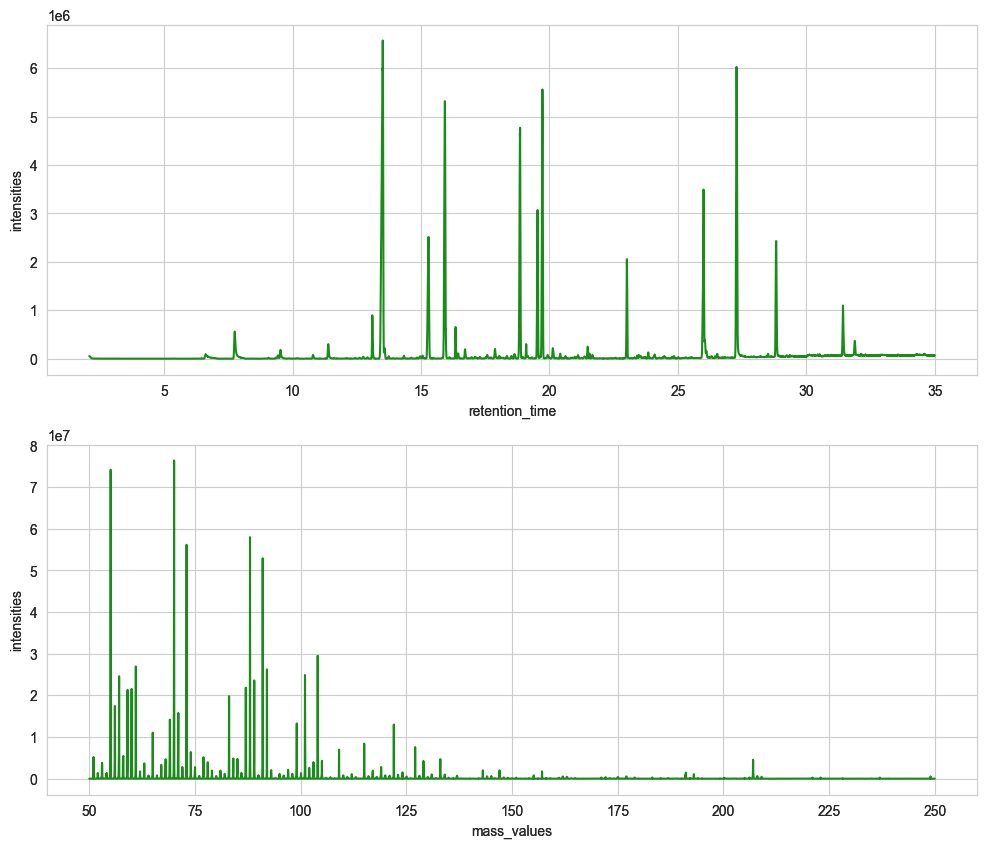

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

my_data = pd.DataFrame(beer_data[0])
# Creating figure
fig = plt.figure(figsize=(12, 10))

for i in range(0, 2):
    ax1 = fig.add_subplot(2, 1, 1)
    data1 = my_data.groupby(['retention_time']).aggregate({'intensities': 'sum'}).reset_index(drop=False)
    x1 = data1["retention_time"].astype("float") / 60
    y1 = data1["intensities"].astype("float")
    # ax1 = plt.subplot(2,1,1)    
    ax1 = sns.lineplot(data=data1, x=x1, y=y1, c='green', alpha=0.9)

    ax2 = fig.add_subplot(2, 1, 2)
    data2 = my_data.groupby('mass_values').aggregate(intensities=('intensities', 'sum')).reset_index(drop=False)
    x2 = data2["mass_values"]
    y2 = data2["intensities"]
    # ax2 = plt.subplot(2,1,1)    
    ax2 = sns.lineplot(data=data2, x=x2, y=y2, c='green', alpha=0.9)
    # plt.xlabel('Retention time (minutes)', fontweight ='bold') 
    # plt.ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 
plt.savefig(fname="overlay_plot.jpg", dpi=600,
            transparent=True, format="jpg")

# 2D Plot

/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


ValueError: alpha must be between 0 and 1, inclusive, but min is nan, max is nan

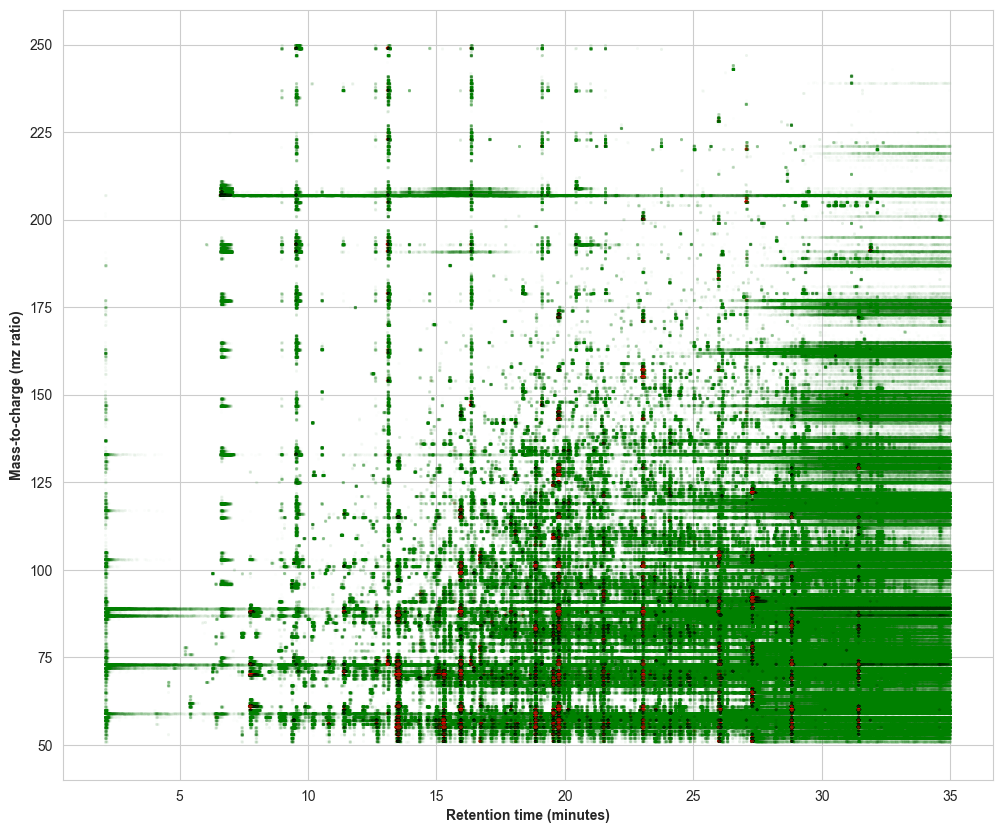

In [4]:
import matplotlib.pyplot as plt

my_data = beer_data

# Creating figure
fig = plt.figure(figsize=(12, 10))

# Creating plot
for i in range(len(my_data)):
    data = my_data[i]
    x = data["retention_time"] / 60
    y = data["mass_values"]
    z = data["intensities"]

    # plot the retention time and mass values
    plt.scatter(x, y,
                c='green',
                marker="x", s=2, alpha=0.01)

    # overlay a plot of the above but coloured by the intensity level where abundant masses are in red
    plt.scatter(x, y,
                c='red',
                marker="x", s=2, alpha=(z/(max(z)))*1
                                        )
    plt.xlabel('Retention time (minutes)', fontweight='bold')
    plt.ylabel('Mass-to-charge (mz ratio)', fontweight='bold')

plt.savefig(fname = "2d_plot.jpg",dpi = 600,
                        transparent=True, format = "jpg")

# 3D Plot

/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


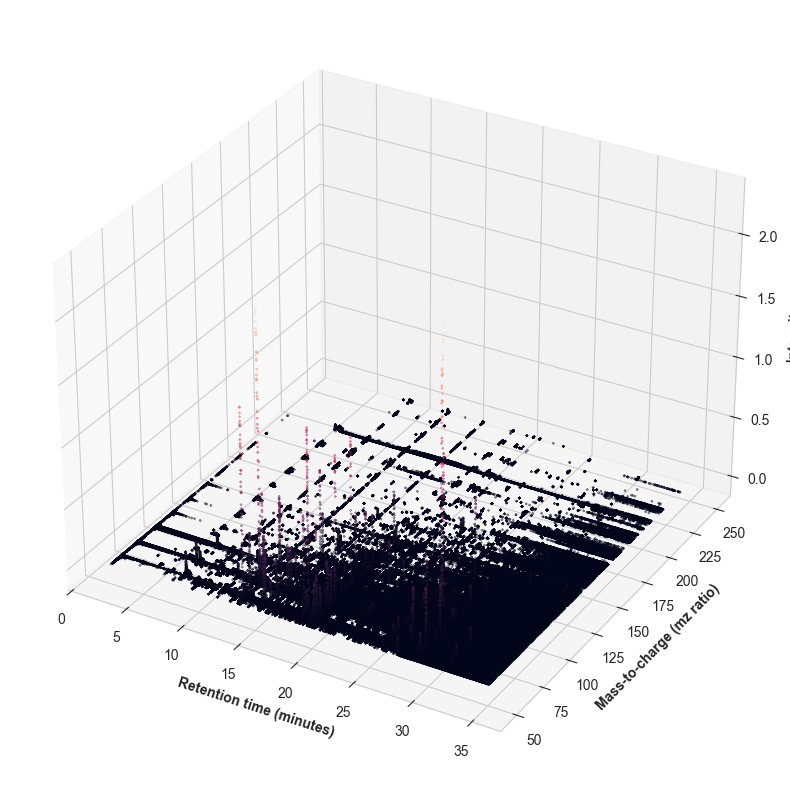

In [5]:
import matplotlib.pyplot as plt

data = beer_data[0]

# Creating figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=data["retention_time"] / 60,
           ys=data["mass_values"],
           zs=data["intensities"],
           c=data["intensities"],
           marker="x", s=1, alpha=0.5)

ax.set_xlabel('Retention time (minutes)', fontweight='bold')
ax.set_ylabel('Mass-to-charge (mz ratio)', fontweight='bold')
ax.set_zlabel('Intensity', fontweight='bold')
plt.savefig(fname="3d_plot.jpg", dpi=300,
            transparent=True, format="jpg")

# Overlay of TIC and mass spectra

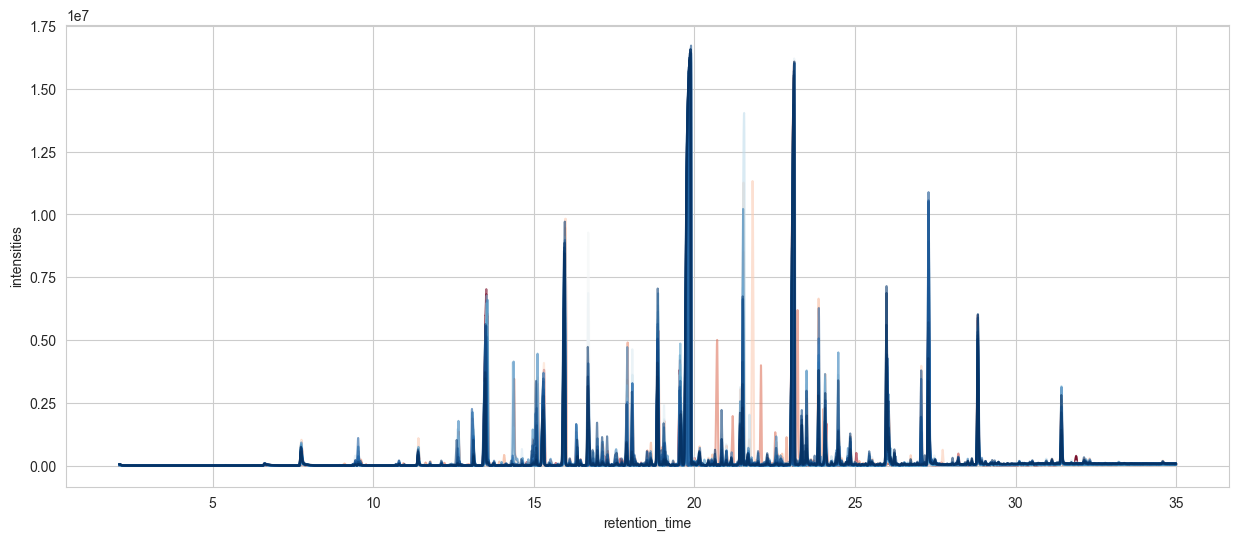

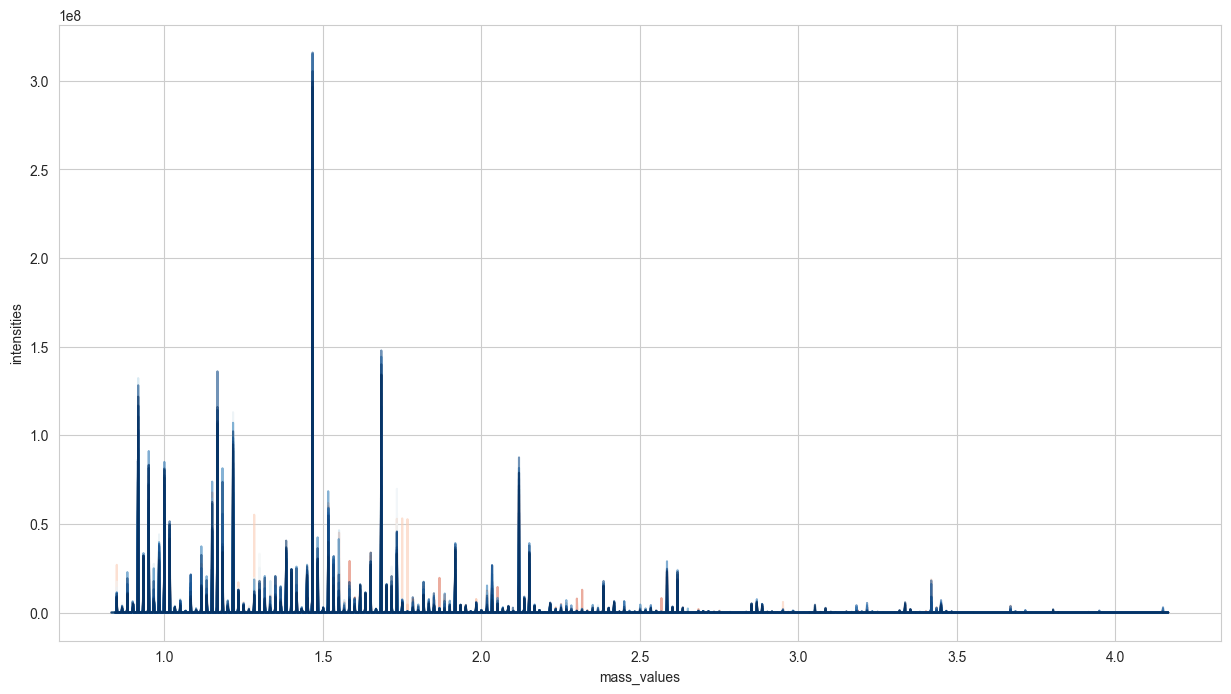

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.colormaps['RdBu']
n_lines = len(beer_data)
colors = cmap(np.linspace(0, 1, n_lines))

# Creating figure
fig = plt.figure(figsize=(15, 6))

# Retention time spectrum
for i, color in enumerate(colors):
    my_data = pd.DataFrame(beer_data[i])
    tic_overlay = my_data.groupby(['retention_time']).aggregate({'intensities': 'sum'}).reset_index(drop=False)
    x = tic_overlay["retention_time"].astype("float") / 60
    y = tic_overlay["intensities"].astype("float")
    sns.lineplot(data=tic_overlay, color=color, x=x, y=y,alpha=0.6)
plt.savefig(fname="overlay_TIC_plots.jpg", dpi=600,
            transparent=True, format="jpg")

fig = plt.figure(figsize=(15, 8))
# MS spectrum
for i, color in enumerate(colors):
    my_data = pd.DataFrame(beer_data[i])
    tic_overlay = my_data.groupby(['mass_values']).aggregate({'intensities': 'sum'}).reset_index(drop=False)
    x = tic_overlay["mass_values"].astype("float") / 60
    y = tic_overlay["intensities"].astype("float")
    sns.lineplot(data=tic_overlay, color=color, x=x, y=y,alpha=0.6)
plt.savefig(fname="overlay_mz_plots.jpg", dpi=600,
            transparent=True, format="jpg")